<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Jisha_Obukwelu_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












### 1. Replicate Lesson Code

Fivethirtyeight Graph 

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

####Download Necessary Libraries

In [0]:
#DOWNLOAD NECESSARY LIBRARIES
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

import numpy as np
import pandas as pd
import seaborn as sns


####Reproduce With Real Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.head()

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
df.describe()

In [0]:
df = df.set_index('timestamp')

In [0]:
df.head()

In [0]:
df['2017-08-29']

In [0]:
lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category']=='IMDb users']

In [0]:
lastday_filtered.tail()

In [0]:
lastday_filtered['category'].value_counts()

In [0]:
pct_column = [f'{i}_pct' for i in range(1,11)]
pct_column

In [0]:
final = lastday_filtered.tail(1)
final[pct_column].T

In [0]:
plot_data = final[pct_column].T
plot_data.index = range(1,11)
plot_data

####Recreate Graph

In [0]:
#STYLE
plt.style.use('fivethirtyeight')

#FIGURE
fig = plt.figure(figsize=(5, 4))
fig.patch.set(facecolor ='white')


#AXES
ax = plot_data.plot.bar(color='#ed713a', width=0.9)
ax.text (x =-1.7, y = plot_data.max()+4, 
         s ='IMDb ratings for the films as of Aug. 29', 
         fontsize=12)

#LABEL
plt.xlabel('Ratings', fontsize = 10, fontweight = 'bold')
plt.ylabel('Percent of total votes', fontsize = 10, fontweight = 'bold')
plt.title("'An Inconvenient Truth Sequel:Truth to Power' is divisive", 
          fontsize = 13, 
          fontweight = 'bold',
          loc ='left',
          x= -.1, 
          y= 1.1)

plt.xticks(rotation=0,color = '#a7a7a7',fontsize = 9)
plt.yticks(range(0,50,10), labels=[f'{i}' if i!=40 else f'{i}%' for i in range(0, 50, 10)], 
           color='#a7a7a7',
          fontsize = 9)

legend = ax.legend()
legend.remove()
        


NOTES:


*   I am unable to change the color of the figure or axes. 
*   Also, the font families are not in matpotlib. UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
* Also Figsize does not seem to change size - the dimensions change but not the size
Figure size 360x288 with 0 Axes



In [0]:
display(example)

###2. Reproduce another example from FiveThityEight's shared data repository.

In [417]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv'
bob_ross = pd.read_csv(url)
bob_ross.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,GUEST,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STEVE_ROSS,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


####Dropping Columns that I do not need

In [418]:
bob_ross.columns

Index(['EPISODE', 'TITLE', 'APPLE_FRAME', 'AURORA_BOREALIS', 'BARN', 'BEACH',
       'BOAT', 'BRIDGE', 'BUILDING', 'BUSHES', 'CABIN', 'CACTUS',
       'CIRCLE_FRAME', 'CIRRUS', 'CLIFF', 'CLOUDS', 'CONIFER', 'CUMULUS',
       'DECIDUOUS', 'DIANE_ANDRE', 'DOCK', 'DOUBLE_OVAL_FRAME', 'FARM',
       'FENCE', 'FIRE', 'FLORIDA_FRAME', 'FLOWERS', 'FOG', 'FRAMED', 'GRASS',
       'GUEST', 'HALF_CIRCLE_FRAME', 'HALF_OVAL_FRAME', 'HILLS', 'LAKE',
       'LAKES', 'LIGHTHOUSE', 'MILL', 'MOON', 'MOUNTAIN', 'MOUNTAINS', 'NIGHT',
       'OCEAN', 'OVAL_FRAME', 'PALM_TREES', 'PATH', 'PERSON', 'PORTRAIT',
       'RECTANGLE_3D_FRAME', 'RECTANGULAR_FRAME', 'RIVER', 'ROCKS',
       'SEASHELL_FRAME', 'SNOW', 'SNOWY_MOUNTAIN', 'SPLIT_FRAME', 'STEVE_ROSS',
       'STRUCTURE', 'SUN', 'TOMB_FRAME', 'TREE', 'TREES', 'TRIPLE_FRAME',
       'WATERFALL', 'WAVES', 'WINDMILL', 'WINDOW_FRAME', 'WINTER',
       'WOOD_FRAMED'],
      dtype='object')

In [0]:
bob_ross = bob_ross.drop(columns=['EPISODE', 'TITLE'])

In [420]:
#GETTING SUM OF TYPES OF IMAGES IN PAINTINGS
summary = bob_ross.sum(axis = 0, skipna = True)
summary

APPLE_FRAME             1
AURORA_BOREALIS         2
BARN                   17
BEACH                  27
BOAT                    2
BRIDGE                  7
BUILDING                1
BUSHES                120
CABIN                  69
CACTUS                  4
CIRCLE_FRAME            2
CIRRUS                 28
CLIFF                   8
CLOUDS                179
CONIFER               212
CUMULUS                86
DECIDUOUS             227
DIANE_ANDRE             1
DOCK                    1
DOUBLE_OVAL_FRAME       1
FARM                    1
FENCE                  24
FIRE                    1
FLORIDA_FRAME           1
FLOWERS                12
FOG                    23
FRAMED                 53
GRASS                 142
GUEST                  22
HALF_CIRCLE_FRAME       1
                     ... 
MOUNTAIN              160
MOUNTAINS              99
NIGHT                  11
OCEAN                  36
OVAL_FRAME             38
PALM_TREES              9
PATH                   49
PERSON      

####Creating a new dataframe

In [451]:
counts_bob_ross = pd.DataFrame(summary)
counts_bob_ross.reset_index(drop=False, inplace=True)
counts_bob_ross = counts_bob_ross.rename(columns = {'index':'Image', 0:'Image_Counts'})
counts_bob_ross

,Image,Image_Counts
0,APPLE_FRAME,1
1,AURORA_BOREALIS,2
2,BARN,17
3,BEACH,27
4,BOAT,2
5,BRIDGE,7
6,BUILDING,1
7,BUSHES,120
8,CABIN,69
9,CACTUS,4


In [452]:
counts_bob_ross = counts_bob_ross.sort_values(by=['Image_Counts'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
counts_bob_ross

,Image,Image_Counts
58,TREE,361
59,TREES,337
16,DECIDUOUS,227
14,CONIFER,212
13,CLOUDS,179
37,MOUNTAIN,160
32,LAKE,143
27,GRASS,142
48,RIVER,126
7,BUSHES,120


In [0]:
#Changing Image column values to lower case
counts_bob_ross['Image'] = counts_bob_ross['Image'].map(lambda x: x.lower())
counts_bob_ross['Image'] = counts_bob_ross['Image'].str.capitalize()

In [471]:
counts_bob_ross['Avg_Counts'] = (counts_bob_ross['Image_Counts'] / 381)*100
counts_bob_ross.head()

,Image,Image_Counts,Avg_Counts
58,Tree,361,94.750656
59,Trees,337,88.451444
16,Deciduous,227,59.580052
14,Conifer,212,55.643045
13,Clouds,179,46.981627


In [474]:
counts_bob_ross.tail()

,Image,Image_Counts,Avg_Counts
19,Double_oval_frame,1,0.262467
18,Dock,1,0.262467
17,Diane_andre,1,0.262467
6,Building,1,0.262467
33,Lakes,0,0.000000


In [475]:
drop_zeros = counts_bob_ross[counts_bob_ross['Avg_Counts'] >= 1]
drop_zeros

,Image,Image_Counts,Avg_Counts
58,Tree,361,94.750656
59,Trees,337,88.451444
16,Deciduous,227,59.580052
14,Conifer,212,55.643045
13,Clouds,179,46.981627
37,Mountain,160,41.994751
32,Lake,143,37.532808
27,Grass,142,37.270341
48,River,126,33.070866
7,Bushes,120,31.496063


In [476]:
bob = drop_zeros
bob.tail()

,Image,Image_Counts,Avg_Counts
54,Steve_ross,11,2.887139
42,Palm_trees,9,2.362205
12,Cliff,8,2.099738
5,Bridge,7,1.837270
9,Cactus,4,1.049869


####CREATING A HORIZONTAL BAR GRAPH

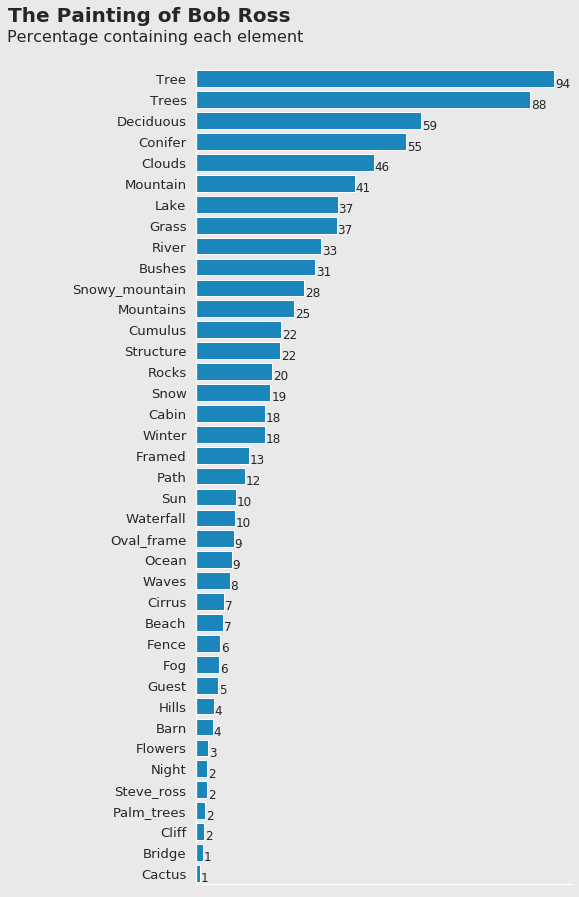

In [495]:
#CREATING GRAPH - LOT MORE COMBINING WOULD HAVE TO BE DONE TO GET THE CORRECT NUMBER

# Initialize the matplotlib figure
f, axs = plt.subplots(figsize=(6, 15))

#Changing background
#Removing grid and box

sns.set_style("dark", {'axes.grid' : False})
# sns.set(rc={'axes.facecolor':'#e9e9e9', 'figure.facecolor':'#e9e9e9'})
sns.set(font_scale=1)

f.set_facecolor('#e9e9e9')
axs.set_facecolor('#e9e9e9')

#Graphing bar plot
axs = sns.barplot(x='Avg_Counts', 
                  y='Image', 
                  data=bob, 
                  color = '#018fd5')
sns.despine()
# plt.despine

#Creating Subtitle
axs.text(x=-50, y=-1.8, s='Percentage containing each element', 
         fontsize=16, weight='light')

#Title
plt.title('The Painting of Bob Ross',
             fontsize = 20,
             fontweight ='bold',
             loc ='left',
             x= -.5, 
             y = 1.05)

#Adding Percentages to Bars
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
show_values_on_bars(axs, "h", 0.2)


#Removing Labels
axs.get_xaxis().set_visible(False)
axs.set_xlabel('')
axs.set_ylabel('')


plt.show()






In [0]:
sns.barplot?

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here